
# **Exploratory Data Analysis of Spotify Listening History**

In this notebook, we will perform exploratory data analysis (EDA) on my own Spotify listening history data. The dataset includes information such as the date and time of listening, artist name, track name, and duration of playback.

## Data Source

The Spotify listening history data was exported from the Spotify app.

## Analysis Goals

1. **Top Artists:** Identify the top ten most listened-to artists.
2. **Top Songs:** Determine the top ten most listened-to songs.
3. **Listening Trends:** Analyze trends in listening behavior over time.
4. **Favorite Artists:** Explore the top songs of favorite artists.
5. **Favorite Songs Over Time:** Examine the frequency of favorite songs over time.

## Tools Used

- Python programming language
- Pandas library for data manipulation
- Matplotlib and Seaborn for data visualization
- Spotify API for data retrieval

## Data Cleaning

Before performing analysis, we will clean the data by checking for missing values, converting data types, and handling any anomalies in the dataset.

## Analysis Steps

1. Load the Spotify listening history dataset.
2. Check data structure and clean the data if necessary.
3. Perform analysis to answer the specified questions.
4. Visualize the results using charts and graphs.
5. Draw conclusions and insights from the analysis.

Let's dive into the data and explore our Spotify listening history!



**Import the necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Load the data**

In [ ]:
dataset = pd.read_json(r'/content/StreamingHistory_music_0.json')

#Display the first five rows of the dataset:
dataset.head()

,endTime,artistName,trackName,msPlayed
0,2023-03-31 10:18,Anurag Vashisht,Tere Jaane Se,66482
1,2023-04-05 12:52,Anurag Vashisht,Tere Jaane Se,9211
2,2023-04-05 12:53,Osho Jain,Humara Ho Gaya,78268
3,2023-04-05 12:53,Anurag Vashisht,Tere Jaane Se,722
4,2023-04-05 12:56,Dream Note,Kahaani,175880


**Check for missing values**

In [ ]:
pd.isnull(dataset).sum()

endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     2557 non-null   object
 1   artistName  2557 non-null   object
 2   trackName   2557 non-null   object
 3   msPlayed    2557 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 80.0+ KB


**Convert Data Types**

In [ ]:
# Convert 'endTime' to datetime format
dataset['endTime'] = pd.to_datetime(dataset['endTime'])

# Convert 'msPlayed' to numeric
dataset['msPlayed'] = pd.to_numeric(dataset['msPlayed'], errors='coerce')

**Top Ten Most Listened to Artists:**

In [ ]:
top_artists = dataset['artistName'].value_counts().head(10)

top_artists

artistName
Prateek Kuhad             108
FLETCHER                  101
Shawn Mendes               96
Os Barões Da Pisadinha     75
Lauren Jauregui            73
Anuv Jain                  70
Troye Sivan                67
RINI                       61
Ariana Grande              61
Doja Cat                   58
Name: count, dtype: int64

**Barchart:**

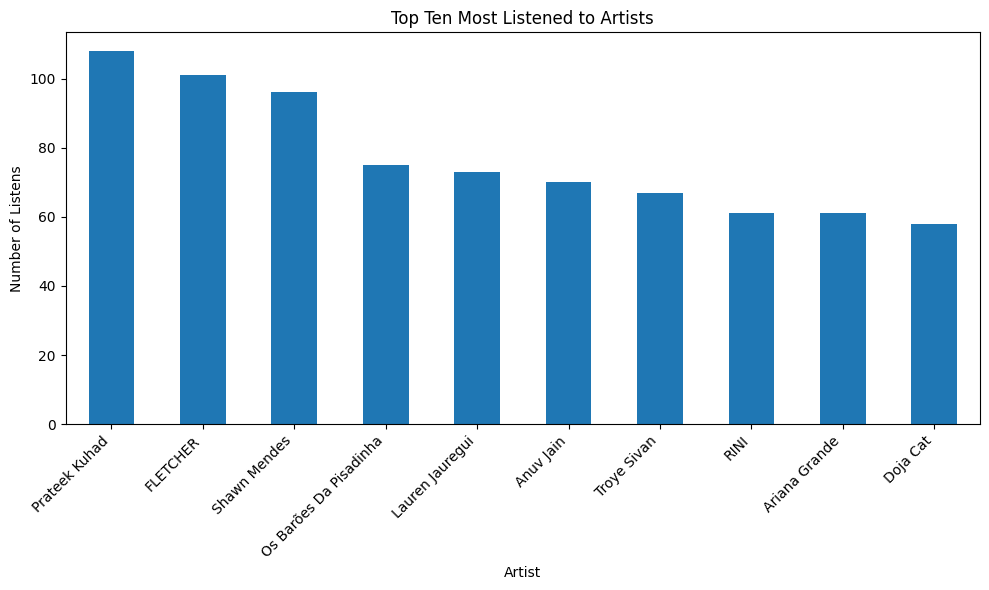

In [ ]:
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar')
plt.title('Top Ten Most Listened to Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Listens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Top Ten Most Listened to Songs:**

In [ ]:
top_songs = dataset.groupby(['artistName', 'trackName']).size().reset_index(name='listens')
top_songs = top_songs.sort_values(by='listens', ascending=False).head(10)

top_songs


,artistName,trackName,listens
477,Os Barões Da Pisadinha,Não Deixa Eu Saber,75
449,Naiara Azevedo,Só Me Usou,26
563,Raveena,Headaches,20
375,Lauren Jauregui,Don't Wanna Say,17
251,FLETCHER,Shh...Don't Say It,17
562,Raveena,Asha’s Kiss (feat. Asha Puthli),16
351,King Princess,Pussy Is God,15
400,Léo Zanetti,Jeitim Que Era - Ao Vivo,15
341,Kehlani,Love Language,15
250,FLETCHER,Sex (With My Ex),14


**Barchart:**

<Figure size 1000x600 with 0 Axes>

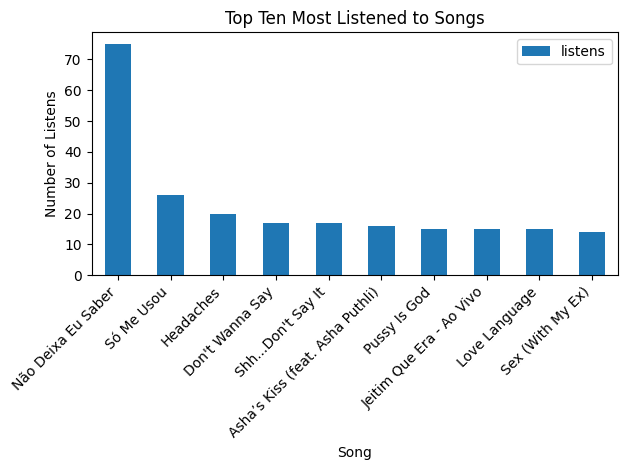

In [ ]:
plt.figure(figsize=(10, 6))
top_songs.plot(kind='bar', x='trackName', y='listens')
plt.title('Top Ten Most Listened to Songs')
plt.xlabel('Song')
plt.ylabel('Number of Listens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Cumulative Time Spent Listening:**

In [ ]:
total_time_ms = dataset['msPlayed'].sum()

#Converting ms into minutes:
total_time_min = total_time_ms / (1000 * 60)

print(f"{total_time_min} mins")

#Converting ms into hours:
total_time_hr = total_time_min / 60

print(f"{total_time_hr} hrs")


5462.103516666667 mins
91.03505861111111 hrs


**Top Songs of Favorite Artists:**

In [ ]:
favorite_artist = 'Lauren Jauregui'
top_songs_favorite = dataset[dataset['artistName'] == favorite_artist].groupby('trackName').size().reset_index(name='listens')
top_songs_favorite = top_songs_favorite.sort_values(by='listens', ascending=False).head(10)

print(f"Top Songs of {favorite_artist}:")
top_songs_favorite

Top Songs of Lauren Jauregui:


,trackName,listens
5,Don't Wanna Say,17
2,Always Love,11
3,Burning,10
12,Scattered,8
14,Trust Issues,5
6,Em(oceans),3
8,Falling,3
9,In Between,3
15,Wolves (feat. Ty Dolla $ign & Russ),3
1,All In My Feelings,2


**Barchart:**

<Figure size 1000x600 with 0 Axes>

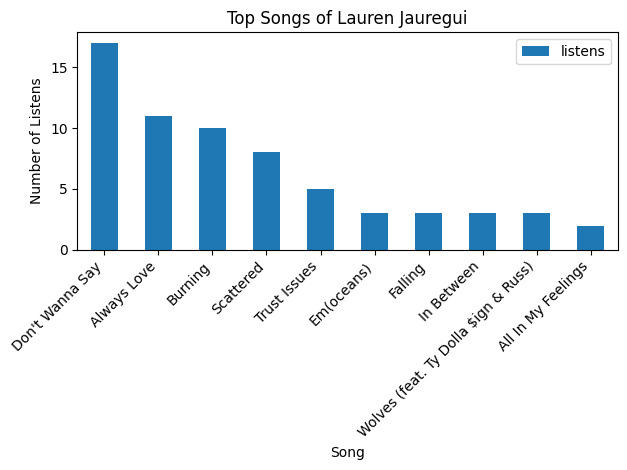

In [ ]:
plt.figure(figsize=(10, 6))
top_songs_favorite.plot(kind='bar', x='trackName', y='listens')
plt.title(f'Top Songs of {favorite_artist}')
plt.xlabel('Song')
plt.ylabel('Number of Listens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Trends in Listening to Favorite Artists:**

In [ ]:
# Make a copy to avoid SettingWithCopyWarning

favorite_artist_trends = dataset[dataset['artistName'] == favorite_artist].copy()
favorite_artist_trends.loc[:, 'date'] = favorite_artist_trends['endTime'].dt.date
trends = favorite_artist_trends.groupby('date').size().reset_index(name='listens')

# Export trends data to CSV
trends.to_csv('favorite_artist_trends.csv', index=False)

print(f"Trends in Listening to {favorite_artist}:")
trends


Trends in Listening to Lauren Jauregui:


,date,listens
0,2023-04-28,2
1,2023-05-08,1
2,2023-05-27,2
3,2023-05-28,1
4,2023-06-03,14
5,2023-06-06,8
6,2023-06-11,3
7,2023-07-13,1
8,2023-12-13,4
9,2023-12-14,2


**Line Plot:**

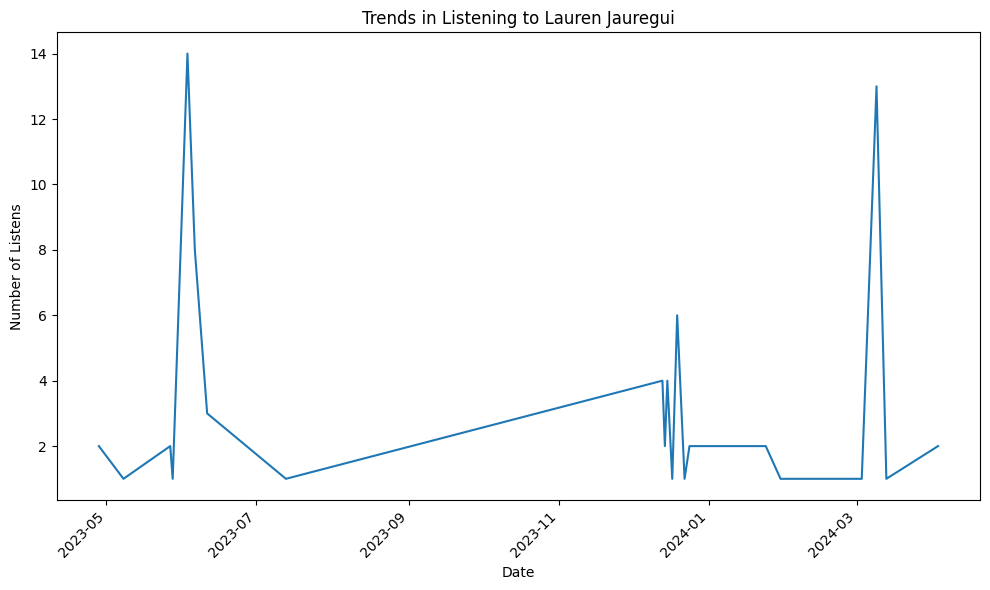

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='listens', data=trends)
plt.title(f'Trends in Listening to {favorite_artist}')
plt.xlabel('Date')
plt.ylabel('Number of Listens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Frequency of Top Songs Over Time:**

In [ ]:
favorite_song = 'Headaches'

# Make a copy to avoid SettingWithCopyWarning

favorite_song_trends = dataset[dataset['trackName'] == favorite_song].copy()
favorite_song_trends.loc[:, 'date'] = favorite_song_trends['endTime'].dt.date
trends_song = favorite_song_trends.groupby('date').size().reset_index(name='listens')

# Export trends_song data to CSV
trends_song.to_csv('favorite_song_trends.csv', index=False)

print(f"Trends of {favorite_song} Over Time:")
trends_song


Trends of Headaches Over Time:


,date,listens
0,2023-07-07,3
1,2023-07-08,1
2,2023-07-09,1
3,2023-07-16,1
4,2023-07-24,2
5,2023-09-13,1
6,2023-12-19,3
7,2023-12-20,2
8,2023-12-22,1
9,2023-12-24,2


**Line Plot:**

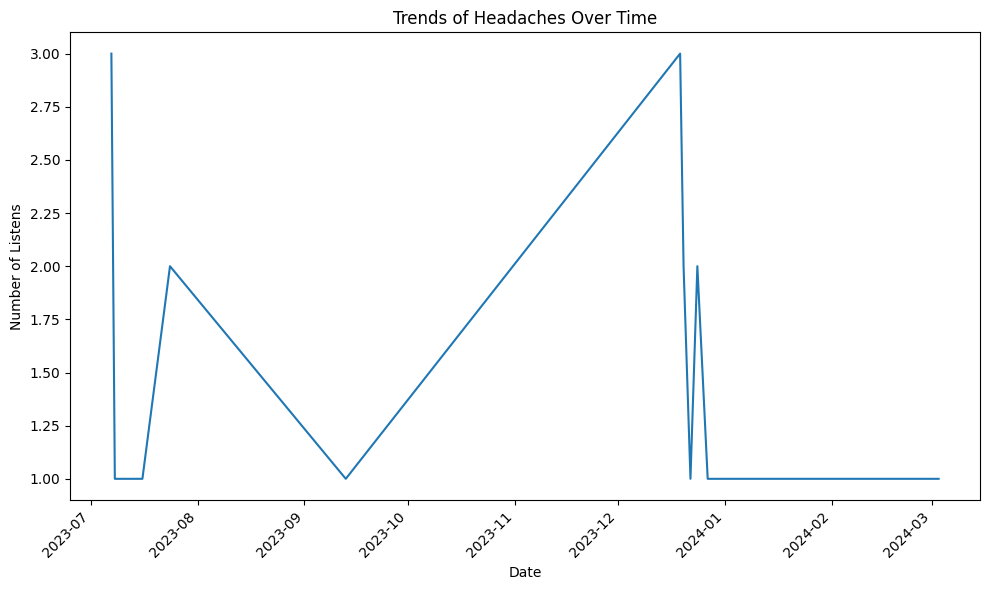

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='listens', data=trends_song)
plt.title(f'Trends of {favorite_song} Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Listens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
